# The Right Bargain

A lot of times it so happens that the HR of the company is confused whether to retain a particular employee by giving a raise or whether the employee is going to stay no matter if he/she is given a raise or whether to simply let that employee go.
* How to make an informed decision?
* What is the necessary data required to make this informed decision?
* How can we use this data to improve the work culture of the company so that we don't lose on a good employee?
* When to let go off a good employee?
* When to let go off a bad employee?
* Or the basic of all questions : How do you define a good employee or a bad employee?

Let the Data Scientist come to your rescue!

## The approach to the solution

Following are the steps that I will be using to address this problem and ultimately finding a solution this problem:

* First thing first, I will try to know more about my dataset first. What all variables my dataset contains, what are the type of these variables, are there any duplicate values?, are there any null values?, are there any type of outliers in any kind of variables?
* Then I will analyze my data. Most probably I will be using visualization to explore and get insights into my dataset. Sometimes you find answers in this step only.
* Because there's a requirement of a machine learning model, there are certain things that should be known before the model could be even built. Like is there any class imbalance that exists, are there any string type labels that needs to be encoded. Also we need to split our data into data used for training and data used for testing so that we can do some model validation.
* Because there are different ways to classify a model, we will build different models: Logistic Regression, Decision Tree, Random Forest. We will then evaluate each and every model on the test data using different metrics like accuracy, precision, recall and F1 score, and then choose the best model out of them.
* Once the model is chosen, we will see which variables matter the most when taking a decision to retain or let go off an employee.
* Finally, we will give some insights of what can be done by the HR to improve the overall work culture or environment of the company so that the employees stay motivated and how we can make the most out of the available resources.

Sounds good?
Let's go then!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Knowing the dataset

Let's start with exploring what our dataset contains.

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


So let's see what do we have here. Most of the columns look pretty straightforward and self explainatory.

* We have **`satisfaction_level`** which tells us how happy/satisfied our employee is. Seems like it is on a scale of 0 to 1.
* Then we have **`last_evaluation`** which tells us about how the employer or, may be, other employees have evaluated a particular employee. Again it seems to be on a scale of 0 to 1.
* **`number_project`** tells us number of projects that employee was involved in.
* **`average_montly hours`** is pretty much self-explainatory. There's a typo in the spellings of 'monthly'.
* Then we have **`time_spend_company`** which is most probably the tenure and looking at the numbers, it tells us about number of years.
* **`Work_accident`!** This kind of data should ideally be collected. **`Work_accident`** can be a column containing binary values or whole numbers. We will get to know in our descriptive analysis.
* Then we have **`left`** which is most probably our binary variable. It is difficult to predict this manually so we will use Machine Learning to predict this.
* Whether or not an employee got promoted in the last 5 years can be known from **`promotion_last_5years`**. Again, it is most probably a binary variable.
* **`Department`** and **`salary`** are self-explainatory. Both are categorical variables.

Let's do some more exploration.

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB



Let's now do some descriptive analysis. This will clear our doubt about whether `Work_accident` and `promotion_last_5years` are binary variables or contain more than 2 values. We will also get to know other arithematic descriptions about all the numerical values.

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



We know there was a typo in the **`average_motly_hours`**. Let us fix that and make all the column names in small caps. Also, we can use **`tenure`** instead of **`time_spend_company`**.

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns = {'Work_accident' : 'work_accident',
                            'average_montly_hours' : 'average_monthly_hours',
                            'time_spend_company': 'tenure',
                            'Department' : 'department'
                           })

df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



Let us check for any missing values

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Fortunately, there are no missing values. Let us now check for any duplicate rows in our dataset.

In [8]:
df0.duplicated().sum()

3008

That's a lot of duplicate rows.


In [9]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Let us drop all these duplicate rows except the original/first one.

In [10]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Analyzing data using visualization

Let us now check for outliers in the data.

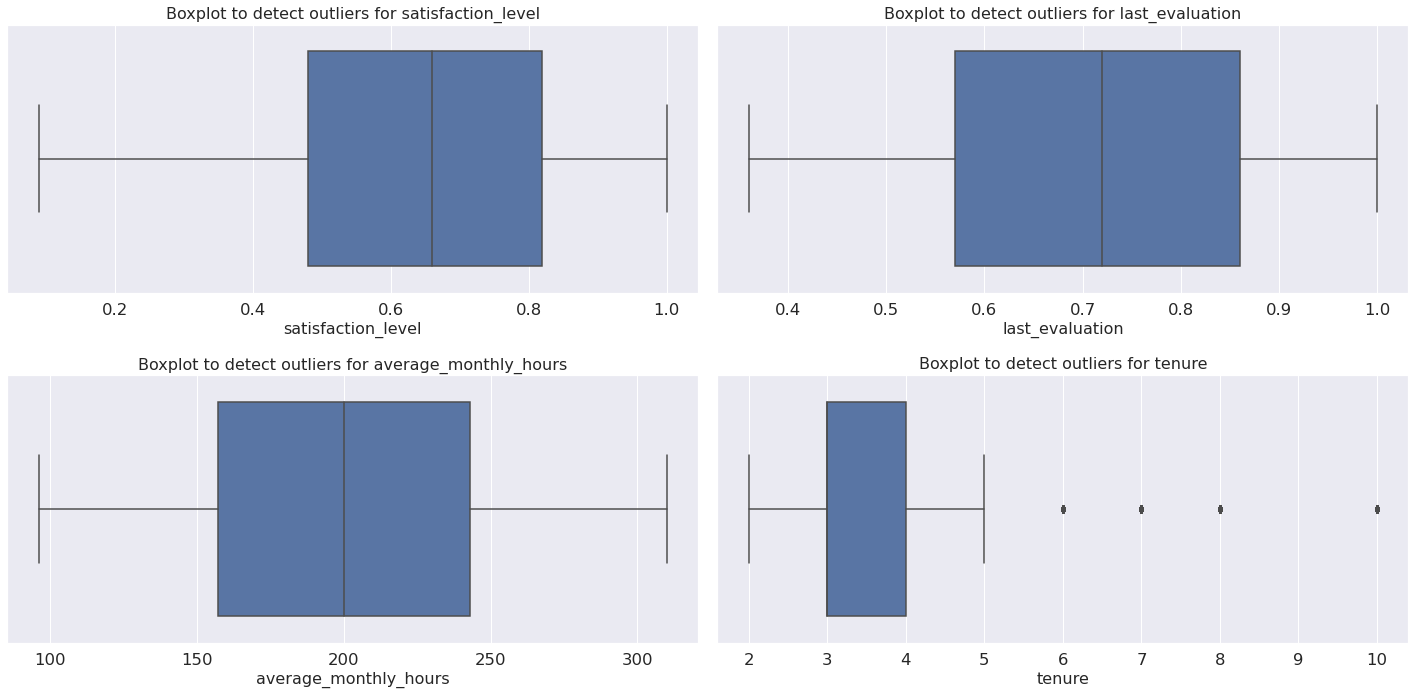

In [11]:
sns.set(font_scale=1.5)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.boxplot(data=df1, x='satisfaction_level', ax=axs[0][0])
axs[0][0].set_title('Boxplot to detect outliers for satisfaction_level', fontsize=16)
axs[0][0].set_xlabel('satisfaction_level', fontsize=16)

sns.boxplot(data=df1, x='last_evaluation', ax=axs[0][1])
axs[0][1].set_title('Boxplot to detect outliers for last_evaluation', fontsize=16)
axs[0][1].set_xlabel('last_evaluation', fontsize=16)

sns.boxplot(data=df1, x='average_monthly_hours', ax=axs[1][0])
axs[1][0].set_title('Boxplot to detect outliers for average_monthly_hours', fontsize=16)
axs[1][0].set_xlabel('average_monthly_hours', fontsize=16)

sns.boxplot(data=df1, x='tenure', ax=axs[1][1])
axs[1][1].set_title('Boxplot to detect outliers for tenure', fontsize=16)
axs[1][1].set_xlabel('tenure', fontsize=16)

plt.tight_layout()
plt.show()

Seems like there are some outliers in **`tenure`** but these are justified as we know that there are some employees who always stay in a company more than 5 years.
Let us check how many employees have stayed for more than the upper limit of inter-quartile range (in this case 5).

In [12]:
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Number of rows in which tenure value is an outlier :', (df1['tenure'] > upper_limit).sum())

Number of rows in which tenure value is an outlier : 824


This particular company has **824** employees which have been in the company for more than 5 years!


Let us now see how many employees and what percentage of employees stayed or have left. This will also give us an idea of how much class imbalance exists.

In [13]:
print(df1['left'].value_counts())
print()
print(df1['left'].value_counts(normalize=True) * 100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


1991 employees have left the company which is equivalent to ~16.6% of the employees mentioned in the data.
Hmm.. Not much of employees have left the company. This is good from company's point of view but bad from building a model's point of view because there exists a huge class imbalance.


Now let's try to understand the relationship among **`average_monthly_hours`**, **`number_project`** and **`left`**. Side-by-side let's try to find how many employees have left based on the number of projects they have done. Let's try to get some insights using visualizations.

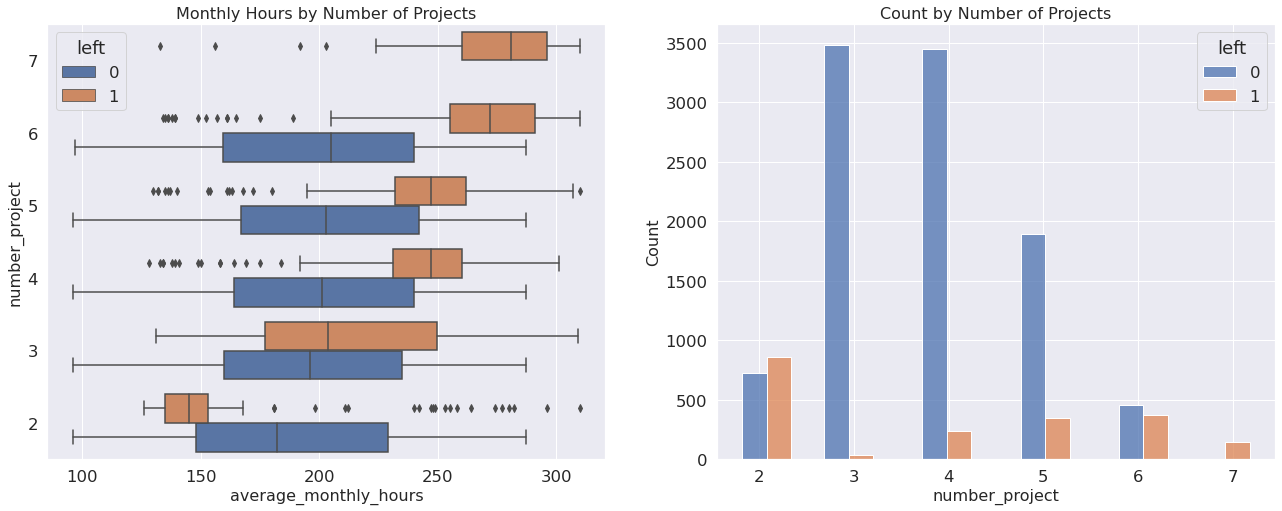

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(22,8))

sns.boxplot(data=df1, y='number_project', x='average_monthly_hours', hue='left', orient='h', ax=axis[0])
axis[0].invert_yaxis()
axis[0].set_title('Monthly Hours by Number of Projects', fontsize=16)
axis[0].set_xlabel('average_monthly_hours', fontsize=16)
axis[0].set_ylabel('number_project', fontsize=16)

sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=3, ax=axis[1])
axis[1].set_title('Count by Number of Projects', fontsize=16)
axis[1].set_xlabel('number_project', fontsize=16)
axis[1].set_ylabel('Count', fontsize=16)

plt.show()

Here is a very interesting insight!

Those employees who have stayed in the company, their average monthly hours do not change whether they are assigned 2 or 3 or 4 or more than 4 projects. This shows that their efficiency has increased. While the employees who have left the company, they have to increase their average monthly hours as they are assigned more projects. Employees should not be given more than 7 projects at one time as they are definitely going to leave irrespective of their average monthly hours.

Also, it seems like 3/4/5 is the sweet spot for assigning the number of projects to an employee. They are less likely to leave the company. Any employee doing 2 or less than 2, and 6 or more than 6 have a very high chance that he/she will leave the company.


Let us now try to understand the relationship among **`satisfaction_level`**, **`average_monthly_hours`** and **`left`**.

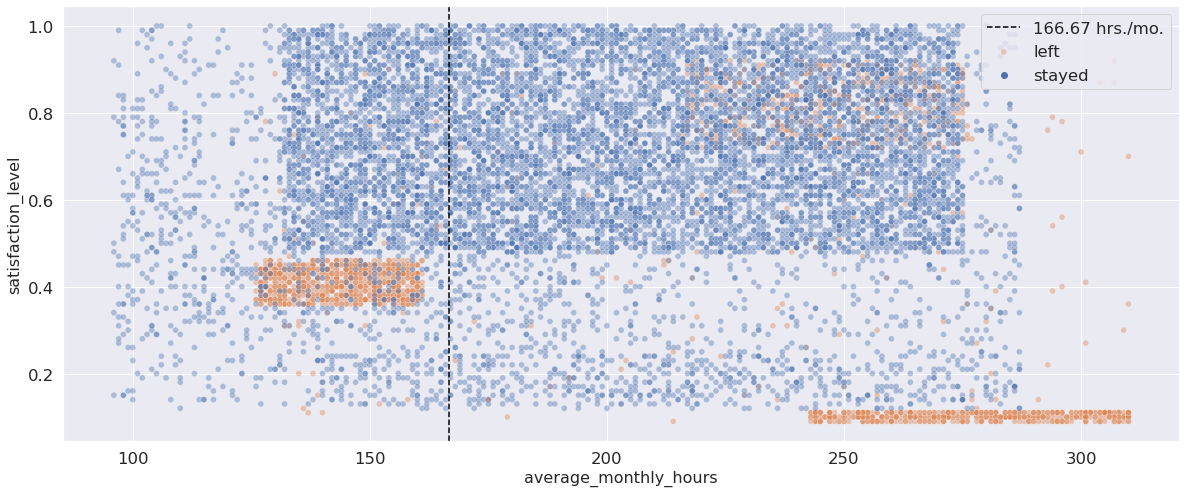

In [15]:
plt.figure(figsize=(20,8))

sns.scatterplot(data=df1, y='satisfaction_level', x='average_monthly_hours', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='black', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.xlabel('average_monthly_hours', fontsize=16)
plt.ylabel('satisfaction_level', fontsize=16)
plt.show()

This scatterplot also gives some interesting insights:
* There's a dense **orange** cloud (employees who have left) in the low `satisfaction` and low `average_monthly_hours` region. It's a good strategy to probably just let them go.
* Then there's a dense **orange** cloud in the high `satisfaction` and high `average_monthly_hours` region. Probably it wouldn't be a bad strategy to let go off these employees too as there can't be much done for an already satisfied employee.
* Then there's a dense **orange** cloud in the low `satisfation` and high`average_monthly_hours` region. These are the employees that need to be compensated well either by improving the work culture or by giving them promotion or by giving them higher salary package.
* There's a big dense **blue** cloud which are in the high `satisfied` region. Their `average_monthly_hours` falls in a wide range.

**Because the clouds are well-defined square/rectangle in shape, this shows that there is a high possibility that this data is rigged/tampered/made-up.**


Let us now try to understand the relationship among **`satisfaction_level`**, **`tenure`** and **`left`**.

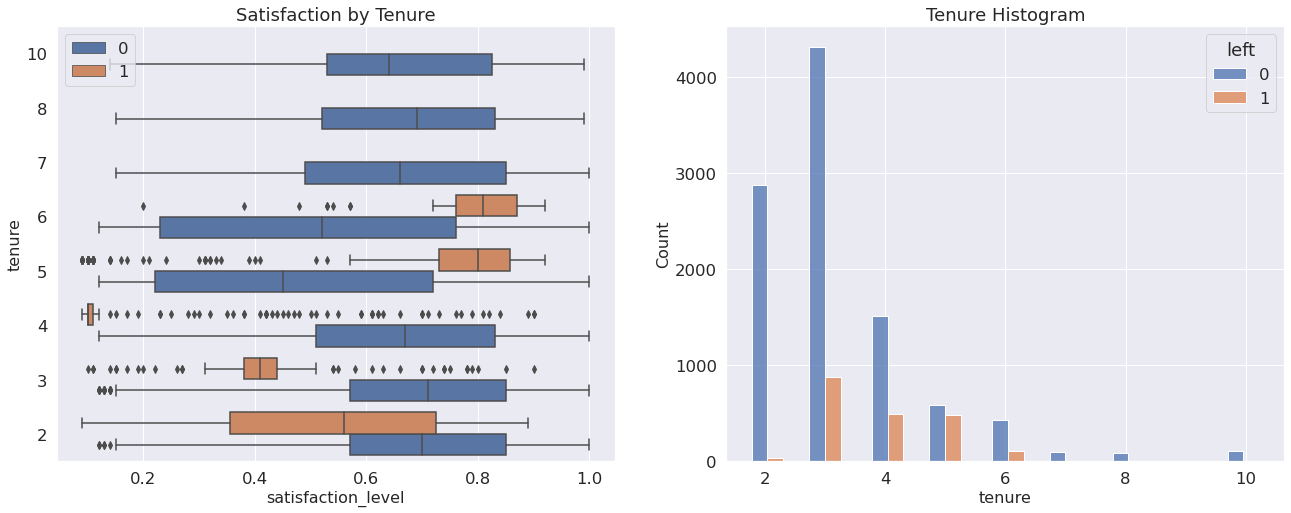

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(22,8))

sns.boxplot(data=df1, y='tenure', x='satisfaction_level', hue='left', orient='h', ax=axis[0])
axis[0].invert_yaxis()
axis[0].set_title('Satisfaction by Tenure')
axis[0].set_xlabel('satisfaction_level', fontsize=16)
axis[0].set_ylabel('tenure', fontsize=16)
axis[0].legend(loc='upper left')

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=6, ax=axis[1])
axis[1].set_title('Tenure Histogram')
axis[1].set_xlabel('tenure', fontsize=16)
axis[1].set_ylabel('Count', fontsize=16)

plt.show()

Again, some interesting insights can be observed:
* Employees who have been in the company for 7 or more than 7 years, will likely to be satisfied and are likely to stay.
* Most of the employees who leave the company are ones who have been working in the company for more than 3 years and have low satisfaction. These are the employees that the HR compensate or atleast know their reasons for dissatisfaction.
* Employees who have served 5 or 6 years and are also satisfied, there can't be much done by the HR for them to stay.
* But the employees that HR needs to target the most are the highly dissatisfied employees who have served the company for 4 years or more.


Let us check the salary structure for these short-term and long-term employees.

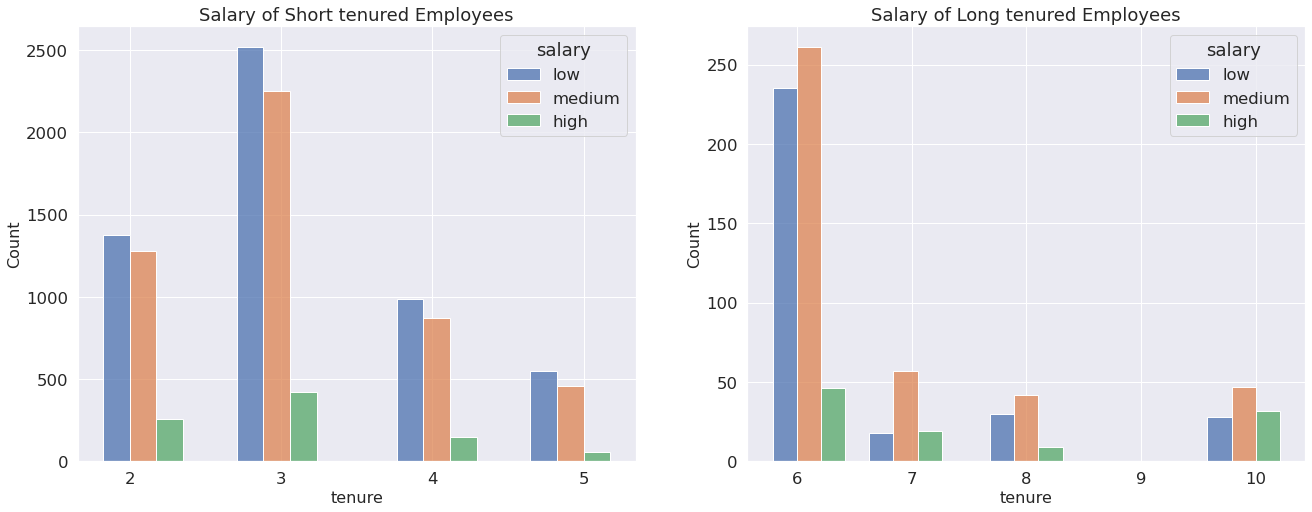

In [17]:
fig, axis = plt.subplots(1, 2, figsize=(22, 8))

short_tenured = df1[df1['tenure'] < 6]
long_tenured = df1[df1['tenure'] >= 6]

sns.histplot(data=short_tenured, x='tenure', hue='salary', multiple='dodge', shrink=3, ax=axis[0],
             hue_order=['low', 'medium', 'high'])
axis[0].set_title('Salary of Short tenured Employees')
axis[0].set_xticks([2,3,4,5])
axis[0].set_xlabel('tenure', fontsize=16)
axis[0].set_ylabel('Count', fontsize=16)

sns.histplot(data=long_tenured, x='tenure', hue='salary', multiple='dodge', shrink=3, ax=axis[1],
             hue_order=['low', 'medium', 'high'])
axis[1].set_title('Salary of Long tenured Employees')
axis[1].set_xlabel('tenure', fontsize=16)
axis[1].set_ylabel('Count', fontsize=16)

plt.show()

Some observations:
* Maximum prportion belongs to low salaried employees in the short-term tenure category.
* Maximum prportion belongs to medium salaried employees in the long-term tenure category.
* The proportion is less for high salary employees across both kind of tenures.


Just like we analyzed a scatterplot to understand the relationship among **`satisfaction_level`**, **`average_monthly_hours`** and **`left`**, let us analyze the relationship among **`last_evaluation`**, **`average_monthly_hours`** and **`left`**.

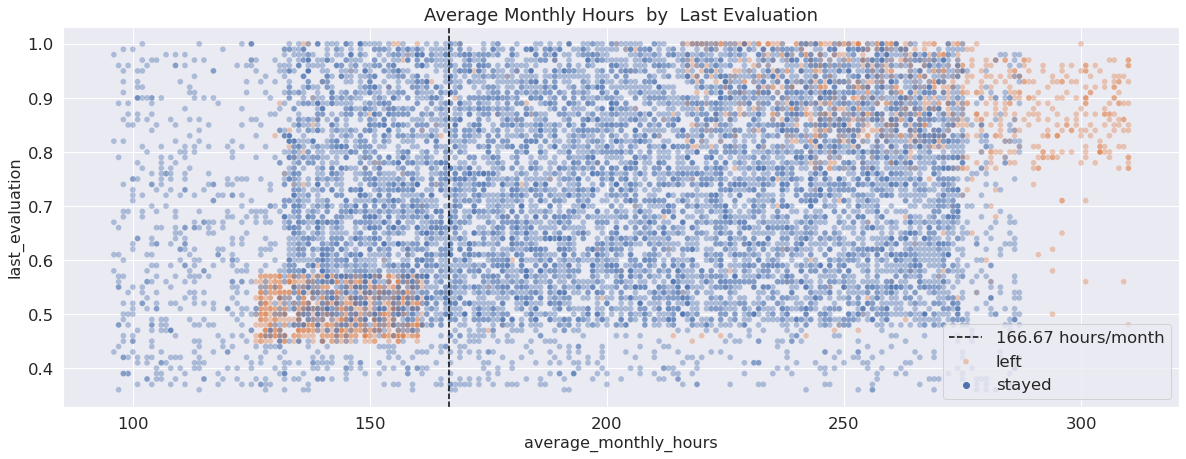

In [18]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.title('Average Monthly Hours  by  Last Evaluation')
plt.axvline(x=166.67, color='black', ls='--')
plt.legend(['166.67 hours/month', 'left', 'stayed'])
plt.xlabel('average_monthly_hours', fontsize=16)
plt.ylabel('last_evaluation', fontsize=16)
plt.show()

This scatterplot also gives some interesting insights:
* There's a dense **orange** cloud (employees who have left) in the low `last_evaluation` and low `average_monthly_hours` region. It's a good strategy to probably just let them go.
* Then there's a dense **orange** cloud in the high `last_evaluation` and high `average_monthly_hours` region. Probably it wouldn't be a bad strategy to let go off these employees too as there can't be much done for an employee which has been evaluated really good.
* There's a big dense **blue** cloud which are in the high `last_evaluation` region. Their `average_monthly_hours` falls in a wide range.

**Because the clouds are well-defined square/rectangle in shape, this shows that there is a high possibility that this data is rigged/tampered/made-up.**


Let us now try to understand the relationship between **`average_monthly_hours`** and **`promotion_last_5years`**.

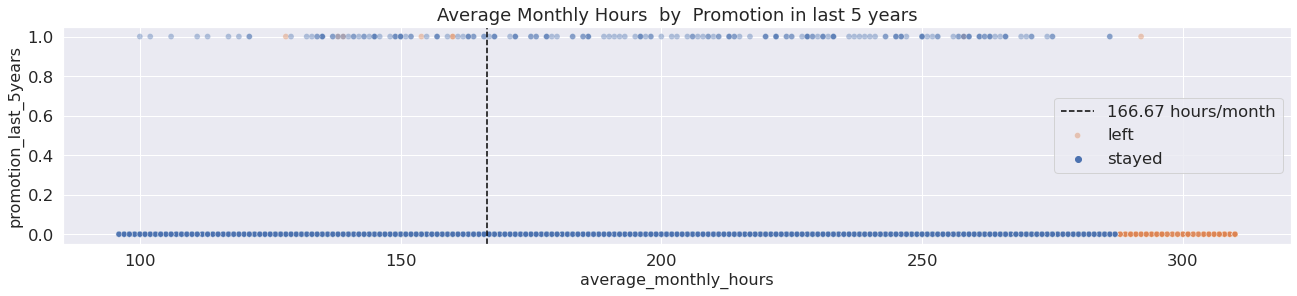

In [19]:
plt.figure(figsize=(22, 4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.title('Average Monthly Hours  by  Promotion in last 5 years')
plt.axvline(x=166.67, color='black', ls='--')
plt.legend(['166.67 hours/month', 'left', 'stayed'])
plt.xlabel('average_monthly_hours', fontsize=16)
plt.ylabel('promotion_last_5years', fontsize=16)
plt.show()

This graph has stated the obvious: 
If an employee has been working more than 280 hours a month and he/she has not received any promotion in 5 years, then the employee is likely to leave the company.


Now let us analyze the distribution department-wise of how many employees left and how many stayed.

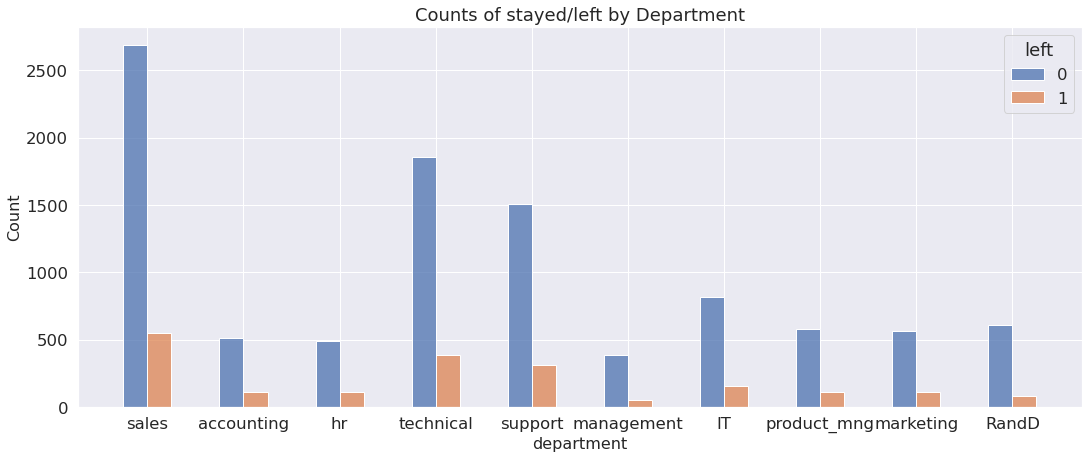

In [20]:
plt.figure(figsize=(18,7))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=.5)
plt.title('Counts of stayed/left by Department')
plt.xlabel('department', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

Mmm... The department-wise distribution doesn't really give any strong insights.

Let's check if there's any correlation between any of these variables.

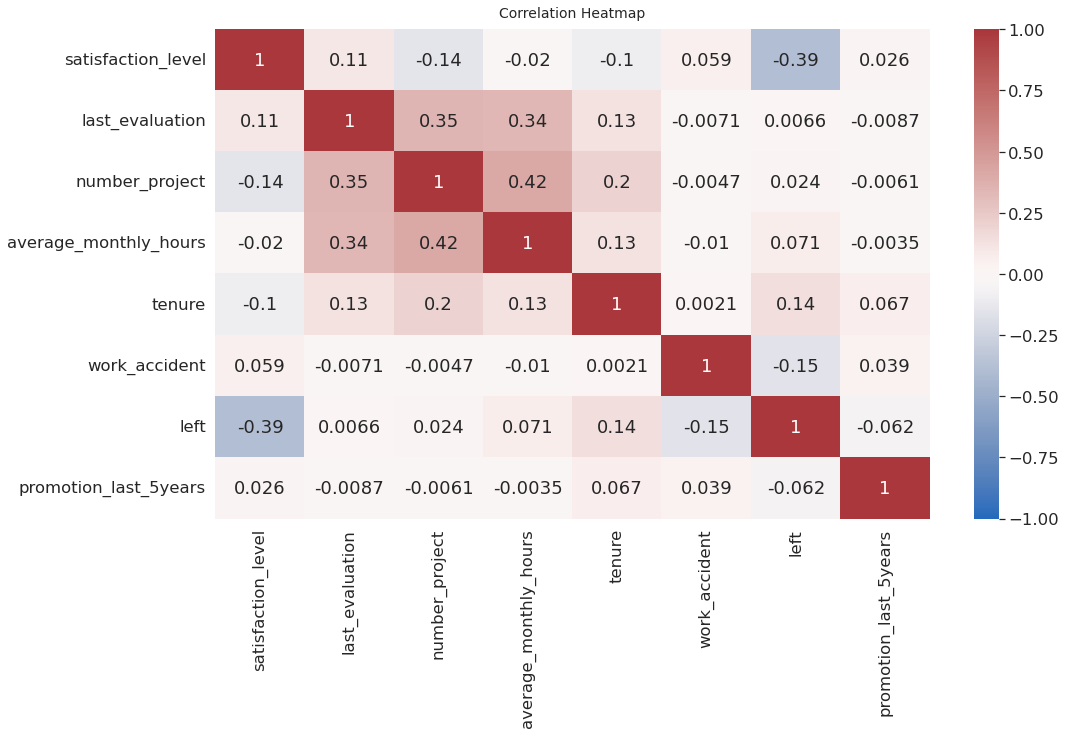

In [21]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

plt.show()

Again, there doesn't seem to be any strong correlation among the variables. This shows that these factors have an independent effect on whether an employee will leave the company or not.

### Preprocessing before we start building the Machine Learning Models

Before we start building the ML models, there are certain things we need to be aware of:
* **Some Machine Learning models are sensitive to outliers.** Although we checked and found that `number_project` contains outliers, we will deal with outliers according to the model that we are building.
* **Class imbalance will cause our Machine Learning model to poorly identify the minority class.** Because there is less information about a certain class, the ML model finds it hard to classify the minority class. We will check for the class imbalance again in next step.
* **Machine Learning models can not identify string data type.** To tackle this problem, if there are any string data type categorical variables in our dataset (which we do have: `salary` and `department`), we need to label encode them.

Let's first check for class imbalance in our outcome variable.

In [22]:
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

The ratio comes out to be **83:17**
This is not a healthy class ratio. We need to fix this. We can do this using resample() function.

In [23]:
from sklearn.utils import resample

df0_majority = df0[df0['left'] == 0]
df0_minority = df0[df0['left'] == 1]

df0_minority_upsampled = resample(df0_minority, replace=True, n_samples=10000, random_state=42)

df0_upsampled = pd.concat([df0_majority, df0_minority_upsampled])

print(df0_upsampled['left'].value_counts())
print()
print(df0_upsampled['left'].value_counts(normalize=True)*100)

0    11428
1    10000
Name: left, dtype: int64

0    53.332089
1    46.667911
Name: left, dtype: float64


The ratio is now **53:47**
Now it is a healthy ratio.


Let us Label Encode our `salary` and `department` variables.
We will use a guided method to encode our `salary` variable as we want to assign 0 for 'low', 1 for 'medium' and 2 for 'high'. If we use the pd.get_dummies() method on `salary`, it would assign 0,1,2 randomly to the `salary` type.
pd.get_dummies() method can be used for `department` however.

In [24]:
df_enc = df1.copy()
df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Let's build our Machine Learning models

First, let's build a table that will store results from all the models. We will then compare these results to choose the best model among these.

In [25]:
table = pd.DataFrame({'Model' : [], 'F1' : [], 'Precision' : [], 'Recall' : [], 'Accuracy' : []})

In [26]:
def model_metrics(model, y_p, y_t):
    F1 = f1_score(y_p, y_t)
    Accuracy = accuracy_score(y_p, y_t)
    Precision = precision_score(y_p, y_t)
    Recall = recall_score(y_p, y_t)
    
    return {'Model' : model, 'F1' : F1, 'Precision' : Precision, 'Recall' : Recall, 'Accuracy' : Accuracy}

#### Logistic Regression
Logistic Regression is sensitive to outliers and we know that `tenure` was the only independent variable that had outliers. So we need to first remove the outliers from `tenure`.

In [27]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0



Let us split our data into training data and test data. The test data will be used to validate our model results.

In [28]:
from sklearn.model_selection import train_test_split

y = df_logreg['left']

X = df_logreg.copy()
X = X.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Let us finally train our model.

In [29]:
%%time
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

CPU times: user 41.3 s, sys: 49.2 s, total: 1min 30s
Wall time: 45.2 s


Let's make some predictions based on our trained model.

In [30]:
y_pred = log_clf.predict(X_test)

#### Logistic Regression Model Validation

Model validation can be done using following methods:
* **Confusion Matrix:** You get to know how many of your predictions positive predictions were actually positive (true positives), how many of the positive predictions were actually negative (false positives), how many of the negative predictions were actually negative (true negatives), and how many of the negative predictions were actually positives (false negatives).
* **Precision:** Precision score tells you that out of all the positive predictions how many were actually true positives.<br>
<center>$Precision = \frac{True Positives}{True Positives  +  False Positives}$</center>
* **Recall:** Recall tells you that out of all the positives, how many positives could our model detect.<br>
<center>$Recall = \frac{True Positives}{True Positives  +  False Negatives}$</center>
* **Accuracy:** Accuracy tells you that out of all the predictions made, how many were true.
<center>$Accuracy = \frac{True Positives + True Negatives}{True Positives  +  False Negatives  +  True Negatives  +  False Positives}$</center>
* **F1 Score:** F1 score is a combination of both precision and recall.
<center>$F1 Score = 2 X \frac{Precision * Recall}{Precision  +  Recall}$</center>

Let us build a Confusion Matrix

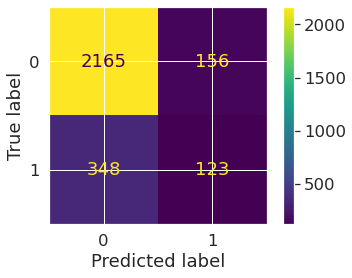

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

Let us also calculate Precision, Recall, Accuracy and F1 Scores

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Precision: 0.44086021505376344
Recall: 0.2611464968152866
Accuracy: 0.8194842406876791
F1 Score: 0.328


The results seem quite bad. Because we do not calculate these scores like this when we had a class imbalance and we had resampled our data. Following is the correct way to do it:

In [33]:
from sklearn.metrics import classification_report

target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Notice how the scores are so good for *Predicted would not leave* and not so good for *Predicted would leave*? That's what class imbalance does to our model. How to interpret the above results? Here's how:

* Out of all the predictions that an employee would not leave, 86% of the time the employees actually did not leave. But out of all the predictions that an employee would leave, only 44% of the time the employees actually left. The macro average is simply the mean of these two precisions (86% and 44%), that is 65%. Because there's a class imbalance, we need to give more weightage to the *Predicted would not leave* than the *Predicted would leave*. Giving 83% weightage to the former and 17% weightage to the later, we get 79%.

* Out of all the employees which actually did not leave, our model could predict 93% of them. But out of all the employees which actually did leave, our model could predict only 26% of them. And just like we claculated the macro and weighted averages in case of precision, we can calculate it here also which comes out to be 60% and 82% respectively.

* Similarly F1 Score can be calculated simply using precision and recall.

* Out of all the predictions made, 82% were true.

Let's store these results from our Logistic Regression model in the table.

In [34]:
table = table.append({'Model':'Logistic Regression', 'Precision':0.79, 'Recall':0.82, 'F1':0.80, 'Accuracy':0.82}, ignore_index=True)

#### Decision Tree

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt_cv_para = {'max_depth' : [4, 5, 6, 7],
              'min_samples_split' : [3, 4, 5, 6],
              'min_samples_leaf' : [3, 4, 5, 6]
             }

scoring = {'precision', 'recall', 'f1', 'accuracy'}

tuned_dt = GridSearchCV(dt, param_grid=dt_cv_para, scoring=scoring, cv=5, refit='f1')
tuned_dt.fit(X_train, y_train)

CPU times: user 4.67 s, sys: 0 ns, total: 4.67 s
Wall time: 4.67 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7],
                         '

In [37]:
y_pred = tuned_dt.best_estimator_.predict(X_test)

In [38]:
table = table.append(model_metrics('Tuned Decision Tree', y_pred, y_test), ignore_index=True)

#### Random Forest

In [39]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_cv_para = {'max_depth' : [4, 5, 6, 7],
              'min_samples_split' : [3, 4, 5, 6],
              'min_samples_leaf' : [3, 4, 5, 6],
              'max_features' : [2, 3, 4],
              'n_estimators' : [75, 100, 125]
             }

scoring = {'precision', 'recall', 'f1', 'accuracy'}

tuned_rf = GridSearchCV(rf, param_grid=rf_cv_para, scoring=scoring, cv=5, refit='f1')
tuned_rf.fit(X_train, y_train)

CPU times: user 13min 44s, sys: 0 ns, total: 13min 44s
Wall time: 13min 44s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [40]:
y_pred = tuned_rf.best_estimator_.predict(X_test)

In [41]:
table = table.append(model_metrics('Tuned Random Forest', y_pred, y_test), ignore_index=True)


Let's now compare all the models in one place.

In [42]:
table

,Model,F1,Precision,Recall,Accuracy
0,Logistic Regression,0.800000,0.790000,0.820000,0.820000
1,Tuned Decision Tree,0.954148,0.927813,0.982022,0.984957
2,Tuned Random Forest,0.948066,0.910828,0.988479,0.983166


We have a clear winner over here and it is **Tuned Decision Tree**.
Let's try to find out the best parameters used for the Decision Tree that yielded the best results.

In [43]:
tuned_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 3}

So the best parameters of the Decision Tree that yielded the best results are:
* **Max Depth:** 6
* **Minimum Samples Leaf:** 4
* **Minimum Samples Split:** 3

Let's visualize using a Confusion Matrix how many predictions were True and how many were False.

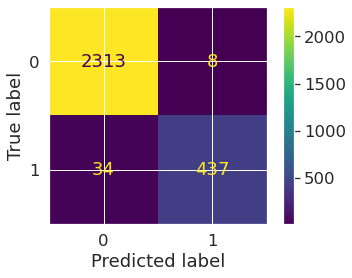

In [44]:
preds = tuned_dt.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tuned_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tuned_dt.classes_)
disp.plot(values_format='');

Decision Trees can be visualized too! We can inspect which characteristic in what quantity caused the split.

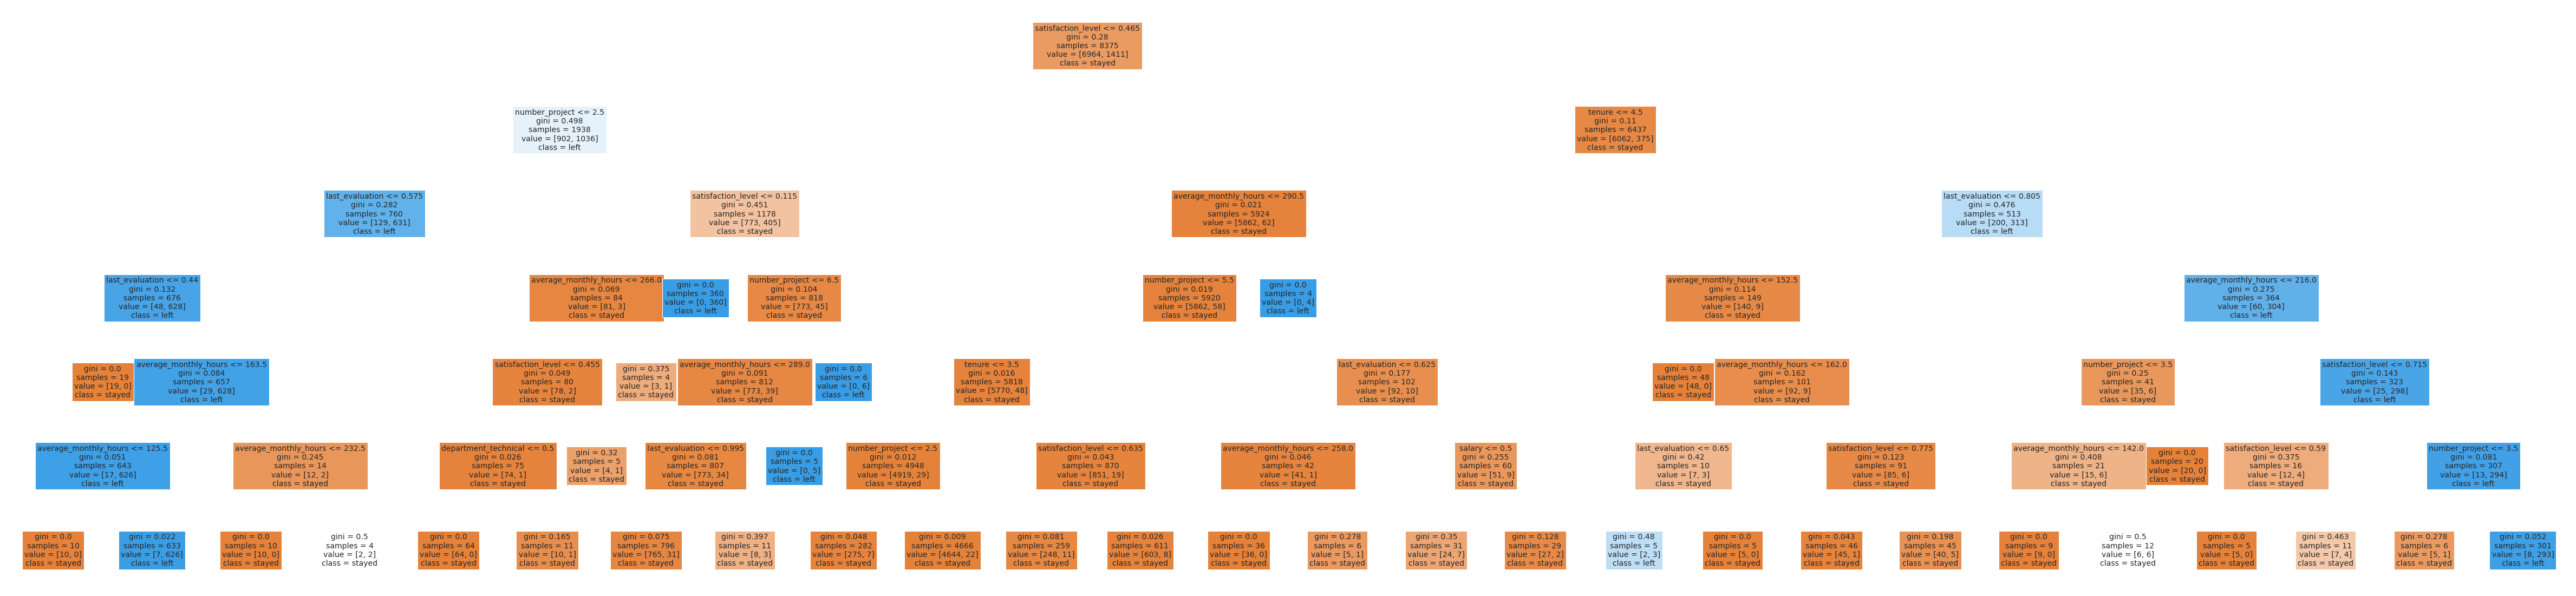

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(85,20))
plot_tree(tuned_dt.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

We can zoom using a double click.

We can also check which feature matters the most. This can be done by comparing the **Gini Importance**

In [46]:
dt_importances = pd.DataFrame(tuned_dt.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dt_importances = dt_importances.sort_values(by='gini_importance', ascending=False)

dt_importances = dt_importances[dt_importances['gini_importance'] != 0]
dt_importances

,gini_importance
satisfaction_level,0.540113
tenure,0.161124
last_evaluation,0.134461
number_project,0.114041
average_monthly_hours,0.049838
salary,0.000349
department_technical,0.000074


Let's visualize the above chart.

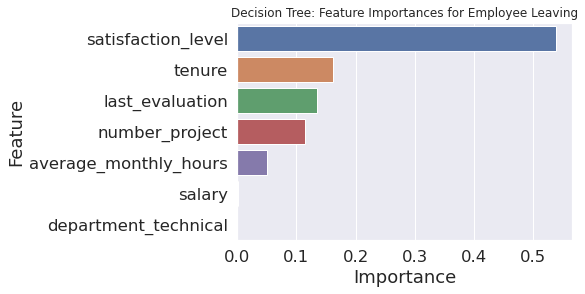

In [47]:
sns.barplot(data=dt_importances, x="gini_importance", y=dt_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The graph shows that **`satisfaction_level`** has the most importance while taking a decision. It is followed by **`tenure`**, **`last_evaluation`**, **`number_project`** and **`average_monthly_hours`**.

### Recommendations for the HR based on insights

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.